In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# A Discrete Convolution Program (5 pts)

Write a discrete convolution function `myConv` that convolves two arrays {$f_i, i = 0, \dots , N_f-1$}
and {$w_j, j = 0, \dots , N_w-1$} to obtain an output time series {$g_n$}. For simplicity, assume a fixed sampling interval $\Delta = 1$, and further, that $f$ and $w$ are $0$ outside of their sampled regions. 

 1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer. 
 2. Please copy and paste your function `g = myConv(f, w)` to the PDF report.
 3. Provide a test to convince yourself (and me) that your function agrees with `numpy.convolve`. For example, generate two random timeseries $f$, $w$ with $N_f=150$, $N_w=100$, drawing each element from $U[0,1]$, and plot the difference between your function's output and numpy's. Include the code for your test in the PDF report.
 4. Compare the speed of your `myConv` function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

_Hint_: For the speed test part, make up your own $f_i$ and $w_j$ time series, and for simplicity, study the cases
of $N_f = N_w = 10, 100, 1000, 10000$. To accurately time each computation of the convolution function, import the
time module and place calls to `time.time` around your code:
```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```
Alternatively, use the `timeit` module:
```
import timeit
print(timeit.timeit('g = myConv(f, w)', number=10000))
```

In [55]:
f = np.arange(0,6)
w = np.arange(0,5)

def myConv(f,w):
    conv = np.zeros(len(f)+len(w)-1)
    for i in range(conv.size):
        for j in range (f.size):
            if i-j >= 0 and i-j < len(w):
                conv[i]=conv[i]+f[j]*w[i-j]
                
    return conv

g=myConv(f,w)

If f is M long and w is N long, the number of non zero values that {g} will take is M+N-1. This is because the f array has M-1 terms and the w array has N-1 terms, and so the resultant array will have N+M-1 terms.

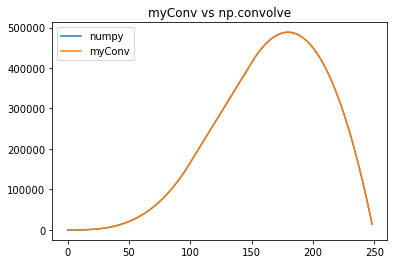

In [56]:
f = np.arange(0,150)
w = np.arange(0,100)

plt.plot(np.convolve(f,w), label = "numpy")
plt.plot(myConv(f,w), label = "myConv")
plt.title("myConv vs np.convolve")
plt.legend(loc="best")

Evidently, the plots overlap showing that they output the same data.

In [58]:
import time

myTimes = np.zeros(4)

f = np.arange(0,10)
w = np.arange(0,10)

t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
myTimes[0] = t2-t1

f = np.arange(0,100)
w = np.arange(0,100)

t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
myTimes[1] = t2-t1

f = np.arange(0,1000)
w = np.arange(0,1000)

t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
myTimes[2] = t2-t1

f = np.arange(0,10000)
w = np.arange(0,10000)

t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
myTimes[3] = t2-t1


0.0
0.023935317993164062
2.5162694454193115
315.7343714237213


In [12]:
npTimes = np.zeros(4)

f = np.arange(0,10)
w = np.arange(0,10)

t1 = time.time()
g = np.convolve(f, w)
t2 = time.time()
print(t2-t1)
npTimes[0] = t2-t1

f = np.arange(0,100)
w = np.arange(0,100)

t1 = time.time()
g = np.convolve(f, w)
t2 = time.time()
print(t2-t1)
npTimes[1] = t2-t1

f = np.arange(0,1000)
w = np.arange(0,1000)

t1 = time.time()
g = np.convolve(f, w)
t2 = time.time()
print(t2-t1)
npTimes[2] = t2-t1

f = np.arange(0,10000)
w = np.arange(0,10000)

t1 = time.time()
g = np.convolve(f, w)
t2 = time.time()
print(t2-t1)
npTimes[3] = t2-t1


0.0
0.0
0.0019953250885009766
0.1725451946258545


Text(0, 0.5, 'Time')

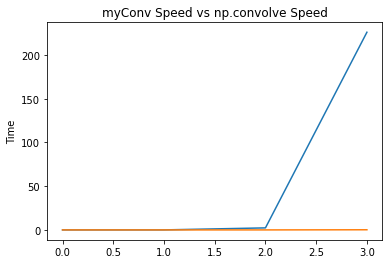

In [13]:
plt.plot(myTimes)
plt.plot(npTimes)
plt.title("myConv Speed vs np.convolve Speed")
plt.ylabel("Time")

Evidently, np.convolve is way faster than the myConv function

# Simple Physical System: RL Circuit Response (7 pts)

Consider a simple physical system consisting of a resistor (with resistance `R`) and an inductor (with
inductance `L`) in series. We apply an input voltage $a(t)$ across the pair in series, and measure the output
voltage $b(t)$ across the inductor alone. For this linear system,

 1. Show analytically that its step response (i.e., the $b(t)$ we obtain when the input voltage $a(t) = H(t)$,
    the Heaviside function) is given by

    $$ S(t) = e^{-Rt/L} H(t), $$

    and its impulse response (i.e., the output voltage $b(t)$ when $a(t) = \delta(t)$) is given by

    $$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t). $$

    _Hint_: Construct and solve the ODE relating the voltages under consideration. Consider the two $b(t)$ choices to derive $S(t)$ and $R(t)$. Formulas $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$ may help.
 2. Discretize the impulse response $R(t)$ function, realizing that $H(t)$ should be discretized as

    $$H = [0.5, 1, 1, \dots],$$

    and $\delta(t)$ should be discretized as

    $$D = [1/dt, 0, 0, \dots].$$

    Take advantage of your `myConv` function, or the NumPy built-in function `convolve`, and write
    your own Python function `V_out = RLresponse(R,L,V_in,dt)` to take an input series $V_{in}$ sampled
    at $\Delta = dt$, and calculate the output series $V_{out}$ sampled by the same $dt$. Please paste your
    Python function here (if you are not using a jupyter notebook). (Hint: here $\Delta$ may not be 1, so remember to build the multiplication of
    $\Delta$ into your convolution function.)
 3. Using $R = 1100 \Omega$, $L = 6 H$, and sampling period $dt = 0.10 \text{ ms}$, test your RL-response
    function with {$H_n$} series (discretized $H(t)$) as input, and plot the output time series (as circles) on
    top of the theoretical curve $S(t)$ given by part 1 (as a solid line). Repeat this for {$D_n$} (discretized
    $\delta(t)$) and $R(t)$. Make the time range of the plots 0 to at least 30 ms. Please list your Python
    code here.

**MATH FOR PART 1 ATTACHED AT BOTTOM

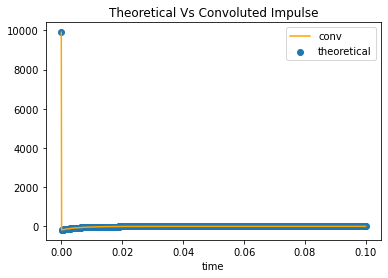

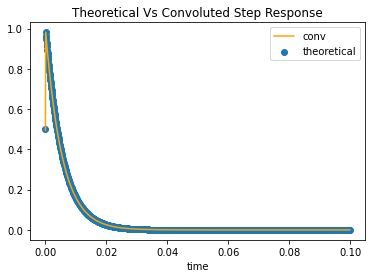

In [66]:
def H(num):
    
    H = np.ones(num)
    H[0] = 0.5
    return H
    
def delta(num, dt):
    
    d = np.zeros(num)
    d[0] = 1/dt
    return d

dt = 0.0001
V = delta(num, dt)
R = 1100
L = 6
t = np.arange(0,0.1, dt)
num = len(t)

def RLresponse(R,L,V_in,dt):
    
    Rt = delta(num,dt) - (R/L)*(np.exp(-R*t/L))*H(num)
    return np.convolve(V_in,Rt)*dt

Rtheo = delta(num, dt)-(R/L)*np.exp(-R*t/L)*H(num)

plt.scatter(t, Rtheo, label = "theoretical",)
plt.plot(t, RLresponse(R, L, delta(num, dt), dt)[:num],  color = "orange", label = "conv")
plt.title("Theoretical Vs Convoluted Impulse")
plt.xlabel("time")
plt.legend(loc = "best")
plt.show()

Stheo = np.e**(-R*t/L)*H(num)

plt.scatter(t, Stheo, label = "theoretical")
plt.plot(t, RLresponse(R, L, H(num), dt)[:num],  color = "orange", label = "conv")
plt.title("Theoretical Vs Convoluted Step Response")
plt.xlabel("time")
plt.legend(loc = "best")
plt.show()


# Convolution of a Near-infrared Spectrum (8 pts)

The Total Carbon Column Observing Network (TCCON) is a network of ground-based Fourier transform spectrometers that measure in the near-infrared region (NIR) of the spectrum. These are high spectral resolution instruments that measure the absorption signatures in the NIR of various atmospheric gases. As a result of the high resolution of these instruments, we are able to use the absorption signatures to infer the atmospheric abundance of gases such as CO$_2$, CH$_4$, and H$_2$O. The file `FTIR_ETL_TCCON.asc` contains measurements from a Fourier transform spectrometer at East Trout Lake, Saskatchewan. These are measurements that were made by Prof. Debra Wunch’s group on 20 April 2017. (The file contains the spectrum as a function of wavenumbers $\tilde{\nu} = 1/\lambda$ in units of cm$^{-1}$). One way of simulating the spectrum that might be measured by a low-resolution instrument is by convolving the high-resolution spectrum with the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$, where $\Delta$ is a measure of the spectral resolution.

1. Plot the spectrum at East Trout Lake as a function of wavenumbers. 
2. Plot the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$ over the interval $\tilde{\nu}=[-4,4]$, with $\Delta \tilde{\nu} = 0.007533$ cm$^{-1}$, for values of $\Delta = 1$ and $\Delta =3$.
3.	Use numpy's convolve function to convolve the high-resolution spectrum in the file `FTIR_ETL_TCCON.asc` separately with the two curves in Part 2 (i.e., for $\Delta = 1$ and $\Delta = 3$).
4.	For each of the two cases, plot the original and convolved time series over the wavenumber range $[4000,4050]$. Comment on the differences in the convolved time series between the two cases.
5. Consider convolving the spectrum with the following Gaussian: $g(t) = \frac{1}{\sqrt{\pi}L} e^{-(t/L)^2}.$

   Plot The Guassian for $L=0.5$ (over the interval $[-4,4]$) and the timeseries of the convolution of the TCCON spectrum with the Gaussian (over the range [4000,4050]). Comment on the differences between the this convolved time series and those from Part 4.

__Note__

* The high-resolution spectrum in  `FTIR_ETL_TCCON.asc` is given as a text file with two columns: the first column contains the wavenumber of the measurement (in units of cm$^{-1}$) and the second column has the spectral signal (in arbitrary units).
* Use `mode='same'` when calling numpy convolve to truncate the convolution to the max of the supplied arrays (i.e. length of the high-resolution timeseries in our case). This is convenient, since we want to compare the convolution output to the original timeseries.  
* As a check for Parts 4 and 5, ensure that your convolved timeseries is aligned with (or "overlaps") the original timeseries.

Text(0.5, 1.0, 'East Trout Lake Spectrum')

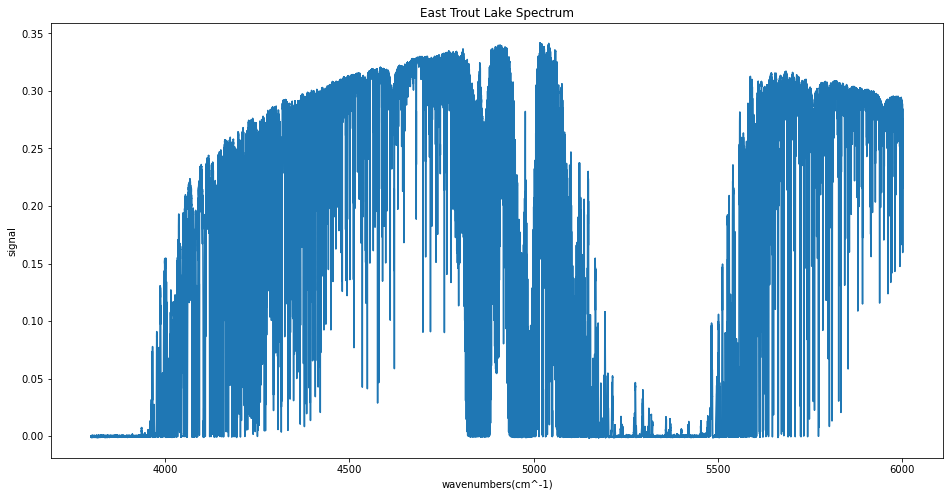

In [63]:
wavenumbers, signal = np.loadtxt('FTIR_ETL_TCCON.asc', unpack = True)

plt.figure(figsize=(16, 8))
plt.plot(wavenumbers, signal)
plt.ylabel("signal")
plt.xlabel("wavenumbers(cm^-1)")
plt.title("East Trout Lake Spectrum")

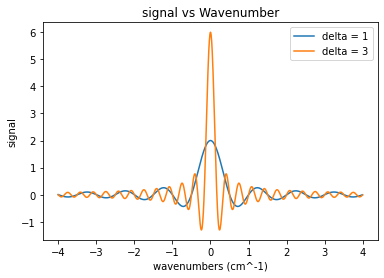

In [64]:
v = np.arange(-4,4,0.007533)

y1 = 2*np.sin(2*np.pi*v)/(2*np.pi*v)
y2 = 6*np.sin(6*np.pi*v)/(6*np.pi*v)

plt.plot(v, y1, label="delta = 1")
plt.plot(v, y2, label="delta = 3")
plt.xlabel("wavenumbers (cm^-1)")
plt.ylabel("signal")
plt.title("signal vs Wavenumber")
plt.legend(loc="best")

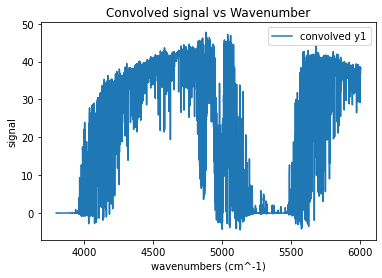

In [66]:
plt.plot(wavenumbers, np.convolve(signal,y1)[:292168], label="convolved y1")
plt.xlabel("wavenumbers (cm^-1)")
plt.ylabel("signal")
plt.title("Convolved signal vs Wavenumber")
plt.legend(loc="best")

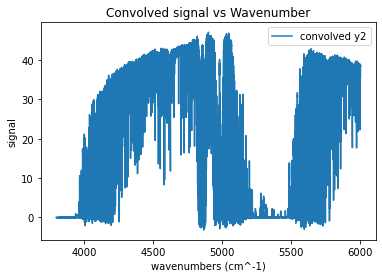

In [65]:
plt.plot(wavenumbers, np.convolve(signal,y2)[:292168], label = "convolved y2")
plt.xlabel("wavenumbers (cm^-1)")
plt.ylabel("signal")
plt.title("Convolved signal vs Wavenumber")
plt.legend(loc="best")

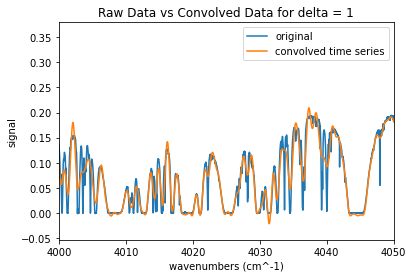

In [61]:
plt.plot(wavenumbers, signal, label = "original")
plt.plot(wavenumbers, np.convolve(signal,y1, mode='same')*0.007533, label = "convolved time series")
plt.xlim(4000,4050)
#plt.ylim(-0.05,30)
plt.xlabel("wavenumbers (cm^-1)")
plt.ylabel("signal")
plt.title("Raw Data vs Convolved Data for delta = 1")
plt.legend(loc = "best")

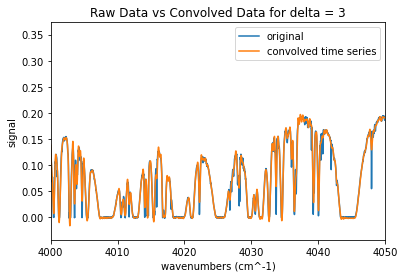

In [62]:
plt.plot(wavenumbers, signal, label = "original")
plt.plot(wavenumbers, np.convolve(signal,y2, mode="same")*0.007533, label = "convolved time series")
plt.xlim(4000,4050)
#plt.ylim(-0.05,0.25)
plt.xlabel("wavenumbers (cm^-1)")
plt.ylabel("signal")
plt.title("Raw Data vs Convolved Data for delta = 3")
plt.legend(loc = "best")

For delta = 1, the convoluted time series is a lot less like the original time series. For delta = 3, they are almost identical, so I predict as delta increases, the convoluted time series becomes smoother and closer to that of the original time series.

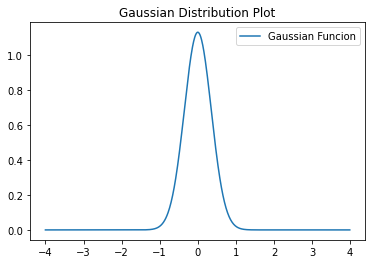

In [56]:
L = 0.5
t3 = np.arange(-4,4,0.01)
g = (np.e**(-(t3/L)**2))/(np.sqrt(np.pi)*L)
plt.plot(t3,g, label = "Gaussian Funcion")
plt.title("Gaussian Distribution Plot")
plt.legend(loc="best")

Text(0.5, 1.0, 'Convolved SIgnal With Gaussian')

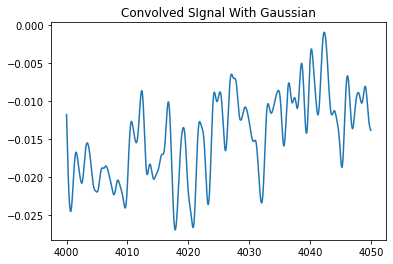

In [57]:
t4 = np.arange(4000, 4050, 0.01)

plt.plot(t4, np.convolve(g, signal, mode='same')[:5000], label="convolved signal")
plt.title("Convolved SIgnal With Gaussian")

This time series is a lot different than those in part 4, but it seems to be smoother and a lot less rigid. The spacing between peaks is a lot larger and there's no flat part on the bottom. The ones in part 4 seemed to have almost a horizontal asymtote at the bottom of the wave.